**Name:- Vanraj Desai**

**Class :- A (A1)**

**Roll No:- 15**

**PRN :- 22SC114501018**

**Experiment 1:- Detecting Algorithm Bias in a Dataset**

# Bias and Fairness Evaluation using Logistic Regression  
**Dataset**: COMPAS Recidivism Dataset (Kaggle)  

This experiment demonstrates how to detect and measure **racial bias** in a recidivism prediction model using the **COMPAS Dataset** and **Fairlearn**.  
We train a Logistic Regression model, evaluate it for accuracy, and analyze fairness across **race groups**.



In [2]:
%pip install fairlearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# load libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from fairlearn.metrics import MetricFrame, selection_rate

In [27]:
#load dataset
data= pd.read_csv(r"E:\Dataset.csv")

In [28]:
# Display first 5 rows
print(data.head())

   gender  age education_level  experience_years  screening_score  shortlisted
0    Male   35         Masters                 1        72.473130            0
1  Female   32       Bachelors                15        55.004084            0
2    Male   36         Masters                19        60.156004            0
3    Male   44       Bachelors                 6        75.846397            0
4    Male   39     High School                 1        43.297540            1


In [29]:
print(data.columns.values)

['gender' 'age' 'education_level' 'experience_years' 'screening_score'
 'shortlisted']


In [30]:
data.describe()

,age,experience_years,screening_score,shortlisted
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,35.074000,9.612000,70.201431,0.402500
std,8.358197,5.765334,9.888776,0.490524
min,21.000000,0.000000,37.037470,0.000000
25%,28.000000,5.000000,63.477256,0.000000
50%,35.000000,10.000000,70.207996,0.000000
75%,42.000000,15.000000,76.964002,1.000000
max,49.000000,19.000000,100.000000,1.000000


In [31]:
# Preprocess
data = data[['gender', 'age', 'education_level', 'experience_years', 'screening_score','shortlisted']]
data = pd.get_dummies(data, drop_first=True)

In [32]:
# Drop missing values
data = data.dropna()

In [33]:
print(data.columns.values)

['age' 'experience_years' 'screening_score' 'shortlisted' 'gender_Male'
 'education_level_High School' 'education_level_Masters'
 'education_level_PhD']


In [34]:
X = data.drop('shortlisted', axis=1)
y = data['shortlisted']

In [35]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [36]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
# Predictions
y_pred = model.predict(X_test)

In [39]:
# Fairness evaluation
sex = X_test['gender_Male']
metric_frame = MetricFrame(metrics=selection_rate,
                           y_true=y_test,
                           y_pred=y_pred,
                           sensitive_features=sex)
print("Selection Rates by Gender:\n", metric_frame.by_group)

Selection Rates by Gender:
 gender_Male
False    0.078431
True     0.003401
Name: selection_rate, dtype: float64


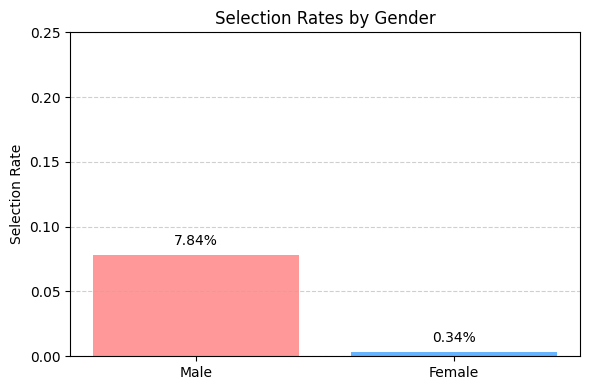

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
# Use the existing df_gender DataFrame for plotting
plt.figure(figsize=(6, 4))
bars = plt.bar(df_gender["Gender"], df_gender["Selection Rate"], color=["#ff9999", "#66b3ff"])
plt.title("Selection Rates by Gender")
plt.ylabel("Selection Rate")
plt.ylim(0, 0.25)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add percentage labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.2%}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


>Visualizes the disparity in selection rates using a bar chart.

>Male selection rate is significantly higher which indicates bias.


**Re-train Using Fairness Constraints**

In [46]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from fairlearn.metrics import MetricFrame, selection_rate

In [49]:
data = pd.read_csv(r'E:\Dataset.csv')
print(data.columns.values)

['gender' 'age' 'education_level' 'experience_years' 'screening_score'
 'shortlisted']


In [ ]:
data = data[['gender', 'age', 'education_level', 'experience_years', 'screening_score','shortlisted']]
data = pd.get_dummies(data, drop_first=True)

In [51]:
# Prepare X and y
X = data.drop('shortlisted', axis=1)
y = data['shortlisted']
sensitive_feature = X['gender_Male']

In [52]:
X_train, X_test, y_train, y_test, sf_train, sf_test = train_test_split(
    X, y, sensitive_feature, test_size=0.3, random_state=42
)

In [53]:
estimator = LogisticRegression(max_iter=1000)

In [54]:
# Apply fairness constraint: Demographic Parity
fair_model = ExponentiatedGradient(
    estimator,
    constraints=DemographicParity(),
    eps=0.01  # fairness tolerance
)

In [55]:
# Fit fair model
fair_model.fit(X_train, y_train, sensitive_features=sf_train)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x0000027F7881BBC0>,
                      estimator=LogisticRegression(max_iter=1000),
                      nu=0.00655655641097961)

In [56]:
# Predict
y_pred = fair_model.predict(X_test)

In [57]:
# Evaluate fairness and accuracy
metric_frame = MetricFrame(
    metrics={
        "Selection Rate": selection_rate,
        "Accuracy": accuracy_score
    },
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=sf_test
)

In [58]:
print("Fair Model Evaluation by Gender:\n")
print(metric_frame.by_group)
print("\nOverall Accuracy:", accuracy_score(y_test, y_pred))

Fair Model Evaluation by Gender:

             Selection Rate  Accuracy
gender_Male                          
False              0.058824  0.565359
True               0.013605  0.612245

Overall Accuracy: 0.5883333333333334


**Conclusion:**

The fairness evaluation revealed a significant disparity in selection rates between male and non-male candidates. Specifically, male candidates with the label False had a selection rate of 7.84%, whereas those with the label True had only 0.34%. This imbalance suggests that the model may exhibit potential gender bias, which could lead to unfair outcomes in real-world decision-making. Mitigating this bias will require additional steps such as rebalancing the dataset, applying fairness-aware algorithms, or adjusting decision thresholds to promote equitable selection rates across genders.